In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [38]:
# Step 1: Load the datasets
train_data = pd.read_csv("C:\\Users\\reshm\\Downloads\\twitter_training.csv")
validation_data = pd.read_csv("C:\\Users\\reshm\\Downloads\\twitter_validation.csv")


In [39]:
# Display the first few rows of each dataset
print(train_data.head())
print(validation_data.head())

   tweet id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
   tweet id     entity   sentiment  \
0      3364   Facebook  Irrelevant   
1       352     Amazon     Neutral   
2      8312  Microsoft    Negative   
3      4371      CS-GO    Negative   
4      4433     Google     Neutral   

                                             content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it fun

In [40]:
# Step 2: Preprocess the data
# Combine train and validation datasets for a unified analysis
combined_data = pd.concat([train_data, validation_data], ignore_index=True)


In [41]:
# Check for missing values
print(combined_data.isnull().sum())


tweet id       0
entity         0
sentiment      0
content      686
dtype: int64


In [42]:
# Drop rows with missing values (if any)
combined_data = combined_data.dropna()


In [43]:
combined_data.head()

,tweet id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


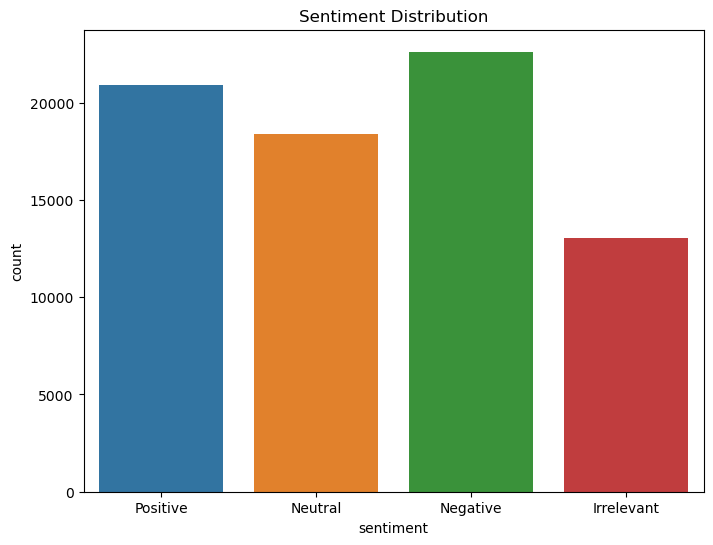

In [45]:
# Step 3: Basic Sentiment Distribution
# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment',data=combined_data)
plt.title('Sentiment Distribution')
plt.show()


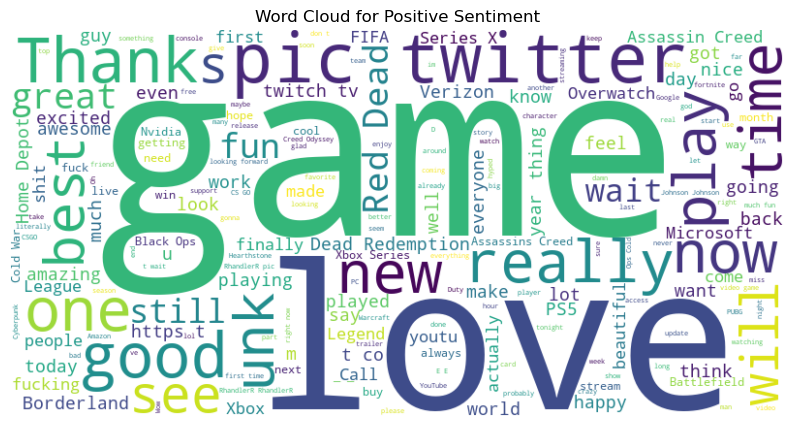

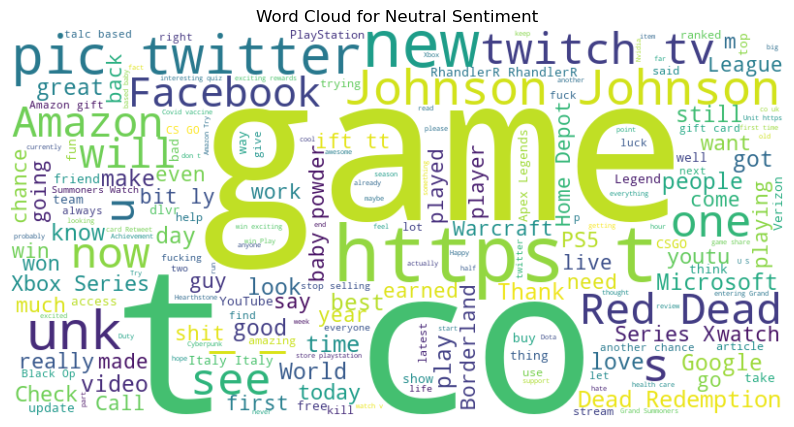

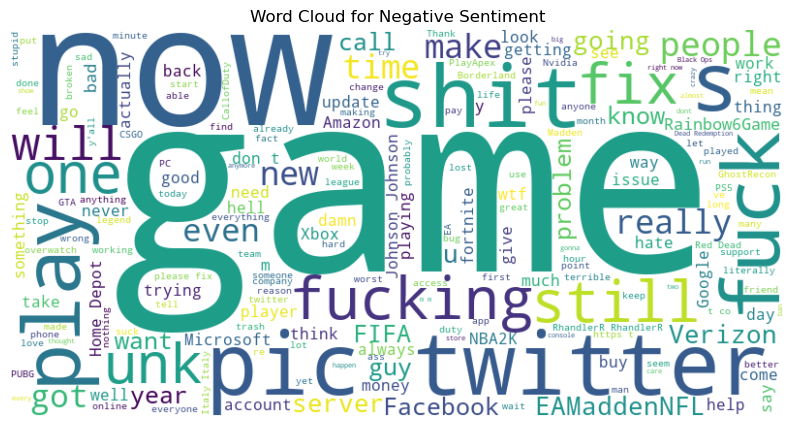

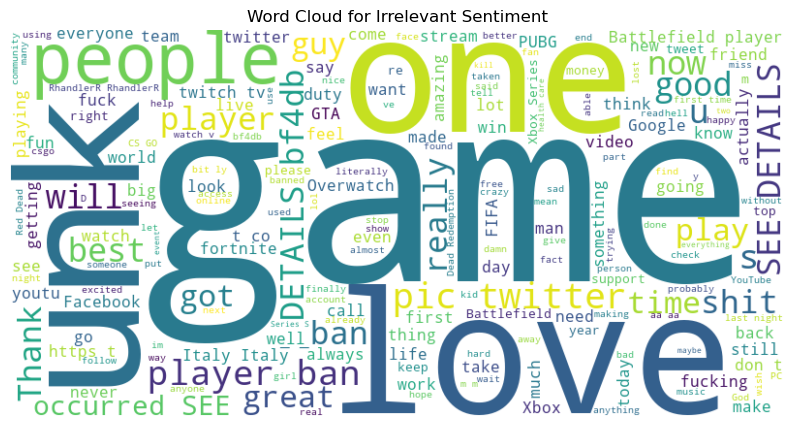

In [54]:
# Step 4: Word Cloud for Each Sentiment
def generate_wordcloud(data, sentiment):
    text = ' '.join(data[data['sentiment'] == sentiment]['content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()
generate_wordcloud(combined_data, 'Positive')
generate_wordcloud(combined_data, 'Neutral')
generate_wordcloud(combined_data, 'Negative')
generate_wordcloud(combined_data,'Irrelevant')

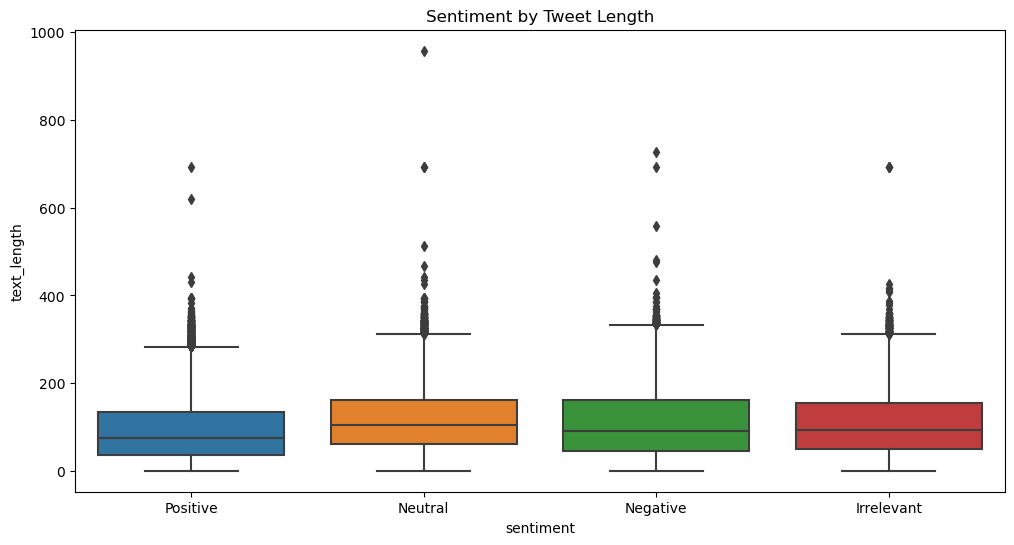

In [56]:
# Step 5: Sentiment Analysis by Length of Tweet
combined_data['text_length'] = combined_data['content'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='text_length', data=combined_data)
plt.title('Sentiment by Tweet Length')
plt.show()


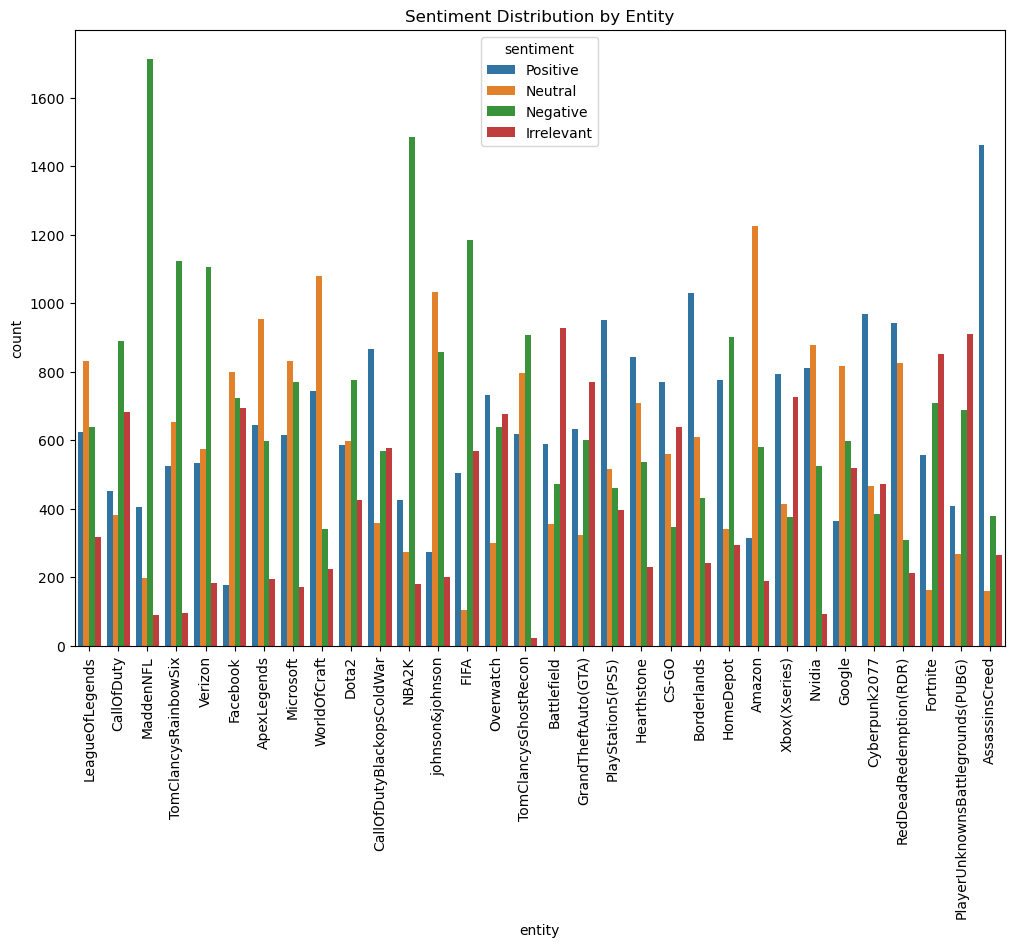

In [61]:
# Step 6: Sentiment Analysis by Entity
plt.figure(figsize=(12, 8))
sns.countplot(x='entity', hue='sentiment', data=combined_data, order=combined_data['entity'].value_counts().index)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=90)
plt.show()
